In [1]:
import pandas as pd

from pandas import DataFrame as df
import numpy as np
import csv
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity 
import pickle
import keras
from keras.preprocessing import sequence
from keras.layers import Input, Dense, Embedding, Reshape, Dot
from keras.models import Model 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
phy_dists = pd.read_csv("data/AG_new/phy_dists.txt", sep = " ", index_col=0)

def getPhyDist(id_1, id_2):
    return(phy_dists[id_1][id_2])

In [ ]:
f = open("data/AG_new/phy_dists.obj", "wb")
pickle.dump(phy_dists, f)
f.close

In [ ]:
#Load phy_distances
f = open("data/AG_new/phy_dists.obj", "rb")
phy_dists = pickle.dump(f)
f.close

In [ ]:
f = open("data/AG_new/allbodysites/qual_vecs.obj", "rb")
qual_vecs = pickle.load(f)
f.close()
qual_vecs.head()

In [ ]:
from sklearn.metrics import pairwise_distances
qual_vec_dists = pairwise_distances(qual_vecs, metric="cosine")
taxa = qual_vecs.index.values
qual_vec_dists = pd.DataFrame(qual_vec_dists, index = taxa, columns = taxa)

In [ ]:
phy_dists_tmp = phy_dists.loc[qual_vecs.index.values, :]
phy_dists_match = phy_dists_tmp.loc[: , [str(i) for i in qual_vecs.index.values]]

In [ ]:
f = open("data/AG_new/allbodysites/phy_dists_match.obj", "wb")
pickle.dump(phy_dists_match, f)
f.close()

f = open("data/AG_new/allbodysites/qual_vecs_dists.obj", "wb")
pickle.dump(qual_vec_dists, f)
f.close()

### Start loading data here 

In [2]:
#rewrite this function with matrix x and y
import matplotlib as mpl
from collections import Counter
def plotLegend(scale, ax, cmap):
    norm = mpl.colors.Normalize(vmin=min(scale), vmax=max(scale))
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm = norm,
                                    orientation='vertical')

def plotCorrelationContour(dists_mat_x, dists_mat_y):

    end_range = np.min([len(dists_vecx), 10000000])
    x = dists_vecx[0:end_range]
    y = dists_vecy[0:end_range]
    bins_x = np.linspace(0, np.max(x), 100)
    bins_y = np.linspace(0, np.max(y), 100)
    x_inds = np.digitize(x, bins_x)
    y_inds = np.digitize(y, bins_y)

    #Count number of times we saw that phy_dist and that qual_dist corresponding
    pairs = zip(x_inds, y_inds)
    pairs_list = [(i,j) for (i,j) in pairs]
    count = Counter(pairs_list)
    
    z = np.zeros((len(bins_y), len(bins_x)))
    for i in range(len(bins_x)):
        for j in range(len(bins_y)):
            z[j, i] = count[(i, j)]
            
    max_val = np.max(z)
    scale = np.arange(1, max_val, max_val / 15)
    cmap = 'viridis'
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), gridspec_kw = {'width_ratios':[20, 1]})
    ax1.contour(z, levels = scale, cmap =  cmap)
    print(np.max(y_inds))
    ax1.set_ylim(0, np.max(y_inds))
    ax1.set_xlim(0, np.max(x_inds))
    plotLegend(scale, ax2, cmap)



In [48]:
from collections import Counter
from itertools import chain
mat = np.matrix([[1,2,1],[2,3,4],[4,5,6]])


def countOccurrencesMatrix(mat):
    counter_list = []
    for i in range(mat.shape[0]):
        counter_list.append(Counter(np.squeeze(np.asarray(mat))[i]))
    return(sum(counter_list, Counter()))
    

Counter({1: 2, 2: 2, 3: 1, 4: 2, 5: 1, 6: 1})

In [3]:
#rewrite this function with matrix x and y
import matplotlib as mpl
from collections import Counter
def plotLegend(scale, ax, cmap):
    norm = mpl.colors.Normalize(vmin=min(scale), vmax=max(scale))
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm = norm,
                                    orientation='vertical')

def plotCorrelationContour(dists_vecx, dists_vecy):

    end_range = np.min([len(dists_vecx), 10000000])
    x = dists_vecx[0:end_range]
    y = dists_vecy[0:end_range]
    bins_x = np.linspace(0, np.max(x), 100)
    bins_y = np.linspace(0, np.max(y), 100)
    x_inds = np.digitize(x, bins_x)
    y_inds = np.digitize(y, bins_y)

    #Count number of times we saw that phy_dist and that qual_dist corresponding
    pairs = zip(x_inds, y_inds)
    pairs_list = [(i,j) for (i,j) in pairs]
    count = Counter(pairs_list)
    
    z = np.zeros((len(bins_y), len(bins_x)))
    for i in range(len(bins_x)):
        for j in range(len(bins_y)):
            z[j, i] = count[(i, j)]
            
    max_val = np.max(z)
    scale = np.arange(1, max_val, max_val / 15)
    cmap = 'viridis'
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), gridspec_kw = {'width_ratios':[20, 1]})
    ax1.contour(z, levels = scale, cmap =  cmap)
    print(np.max(y_inds))
    ax1.set_ylim(0, np.max(y_inds))
    ax1.set_xlim(0, np.max(x_inds))
    plotLegend(scale, ax2, cmap)



In [4]:
f = open("data/AG_new/allbodysites/phy_dists_match.obj", "rb")
phy_dists_match = pickle.load(f)
f.close()

f = open("data/AG_new/allbodysites/qual_vecs_dists.obj", "rb")
qual_vec_dists = pickle.load(f)
f.close()

In [9]:
#Pick 1000 random rows
rand_row = np.random.choice(range(phy_dists_match.shape[0]), 5000)
phy_dists_small = phy_dists_match.iloc[rand_row, :]
qual_dists_small = qual_vec_dists.iloc[rand_row, :]

In [10]:
#Turn matrices into vectors
phy_dists_vec = np.array([i for sublist in np.array(phy_dists_small) for i in sublist])
qual_dists_vec = np.array([i for sublist in np.array(qual_dists_small) for i in sublist])
taxa_pairs = np.array([(i, j) for i in phy_dists_small.index.values for j in phy_dists_small.columns.values])

In [11]:
#Find na values and remove from all lists
import math
na_inds = np.argwhere(np.isnan(phy_dists_vec))
phy_dists_vec = np.delete(phy_dists_vec, na_inds)
qual_dists_vec = np.delete(qual_dists_vec, na_inds)
taxa_pairs = np.delete(taxa_pairs, na_inds)

100


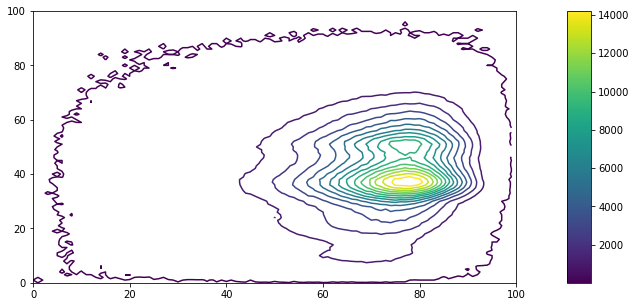

In [12]:
plotCorrelationContour(qual_dists_vec, phy_dists_vec)

In [ ]:
import helper_functions as hf

ko_dists_f = open("data/AG_new/ko_dists.txt", "r")
ko_dists = ko_dists_f.read().split('\n')
ko_dists_f.close()
ko_dists = [float(i) for i in ko_dists if hf.is_number(i)]


qual_vec_dists_f = open('data/AG_new/allbodysites/qual_vecs/qual_vec_dists.txt', "r")
qual_vec_dists = qual_vec_dists_f.read().split('\n')
qual_vec_dists_f.close()
qual_vec_dists = [float(i) for i in qual_vec_dists if hf.is_number(i)]

In [ ]:
plotCorrelationContour(qual_dists_vec, ko_dists)

In [ ]:
#Plot the relationship between phylogenetic distances and embedding distances
end_range = 100
x = phy_dists_vec[0:end_range]
y = qual_dists_vec[0:end_range]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line, color = '#')
plt.xlabel("Phylogenetic Distance")
plt.ylabel("Embedding Distance")

#Correlation
corr = pearsonr(x,y)
print("Pearson Coefficient: " + str(corr[0]))
print("Pearson P-value: " + str(corr[1]))

In [ ]:
qual_dists_vec_neg = 0 - qual_dists_vec
add = qual_dists_vec_neg + phy_dists_vec
sort_ind = np.argsort(add)

In [ ]:
numFeatures = 1500
i = 0
taxa_pairs_keep = []
taxa_keep = set()
numFeaturesSelected = 0
while numFeaturesSelected < numFeatures:
    pair = taxa_pairs[sort_ind[i]]
    taxa_keep.add(pair[0])
    taxa_keep.add(pair[1])
    numFeaturesSelected = len(taxa_keep)
    i = i + 1
    
print("Number of taxa: " + str(len(taxa_keep)))

In [ ]:

file = open("feature_selection/taxa_lowphy_highcos.obj", "wb")
pickle.dump(taxa_keep, file)
file.close()

Old code + graphing utility

In [ ]:
slope = 1.1
intercept = 0.8
y = [slope * i + intercept for i in phy]



In [ ]:
keep = [cosine[i] > y[i] for i in range(len(phy))]

taxa_keep = set()
for pair in np.array(taxa_pairs)[keep]:
    taxa_keep.add(pair[0])
    taxa_keep.add(pair[1])
print("Number of taxa: " + str(len(taxa_keep)))

In [ ]:
file = open("taxa_lowphy_highcos.obj", "wb")
pickle.dump(taxa_keep, file)
file.close()

In [ ]:
plt.scatter(phy[0:100000], cosine[0:100000])
x = [i * .1 for i in range(6)]
plt.plot(x,[slope * i + intercept for i in x] , color = "red")

In [ ]:
print(taxa_pairs_keep[0][0])
print(taxa_pairs_keep[0][1])
print(phy_dists[taxa_pairs_keep[0][0]][taxa_pairs_keep[0][1]])
qual_vec_dists_pd[taxa_pairs_keep[0][0]][taxa_pairs_keep[0][1]]
qual_vec_dists_pd[taxa_pairs_keep[1][0]][taxa_pairs_keep[1][1]]
qual_vec_dists_pd[taxa_pairs_keep[3][0]][taxa_pairs_keep[3][1]]

Plot qual vec dists against ko dists

In [ ]:
import matplotlib as mpl
def plotLegend(scale, ax, cmap):
    norm = mpl.colors.Normalize(vmin=min(scale), vmax=max(scale))
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm = norm,
                                    orientation='vertical')

def plotCorrelationContour(dists_vecx, dists_vecy):
    from collections import Counter
    end_range = 10000000
    x = dists_vecx[0:end_range]
    y = dists_vecy[0:end_range]
    bins_x = np.linspace(0, np.max(x), 100)
    bins_y = np.linspace(0, np.max(y), 100)
    x_inds = np.digitize(x, bins_x)
    y_inds = np.digitize(y, bins_y)

    #Count number of times we saw that phy_dist and that qual_dist corresponding
    pairs = zip(x_inds, y_inds)
    pairs_list = [(i,j) for (i,j) in pairs]
    count = Counter(pairs_list)
    
    z = np.zeros((len(bins_y), len(bins_x)))
    for i in range(len(bins_x)):
        for j in range(len(bins_y)):
            z[j, i] = count[(j, i)]
            
    max_val = np.max(z)
    scale = np.arange(1, max_val, max_val / 15)
    cmap = 'viridis'
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), gridspec_kw = {'width_ratios':[20, 1]})
    ax1.contour(z, levels = scale, cmap =  cmap)
    print(np.max(y_inds))
    ax1.set_ylim(0, np.max(y_inds))
    ax1.set_xlim(0, np.max(x_inds))
    plotLegend(scale, ax2, cmap)



In [ ]:
plotCorrelationContour(qual_vec_dists, ko_dists)

In [ ]:
plotCorrelationContour(qual_vec_dists, phy_dists)

In [ ]:
end_range = 10000
x = np.array(ko_dists[0:end_range])
y = np.array(qual_vec_dists[0:end_range])
#slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [ ]:
slope * np.array(x)

In [ ]:
print(slope)
print(intercept)
line = slope*x+intercept
plt.plot(x,y,'o', color = "#AC76C8")
plt.plot(x, line, color = "orange")
#plt.xlabel("KO Distance")
#plt.ylabel("Embedding Distance")
#Correlation
corr = pearsonr(x,y)
print("Pearson Coefficient: " + str(corr[0]))
print("Pearson P-value: " + str(corr[1]))